In [10]:
import pandas as pd
df = pd.read_csv('C:/Users/yessm/Downloads/test.csv',delimiter=';')
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [11]:
import pandas as pd
df = pd.read_csv('C:/Users/yessm/Downloads/train.csv',delimiter=';')
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [12]:
import numpy as np 
from sklearn import tree
from sklearn.metrics import accuracy_score

train = pd.read_csv('C:/Users/yessm/Downloads/train.csv',delimiter=';')
test = pd.read_csv('C:/Users/yessm/Downloads/test.csv',delimiter=';')

def preprocess_data(data) : 
    new_dataFrame = pd.DataFrame()
    
    new_dataFrame['Age'] = data.Age.fillna(data.Age.mean())
    new_dataFrame['Sex'] = pd.Series([1 if s == 'male'  else 0 for s in data.Sex], name = 'Sex')
    return new_dataFrame

train_data = preprocess_data(train)
test_data =  preprocess_data(test)
    

In [13]:
train_labels = train.Survived
classifier = tree.DecisionTreeClassifier()
classifier.fit(train_data , train_labels)
predicted = classifier.predict(test_data)

print('Score : {}'.format(classifier.score(train_data,train_labels)))

Score : 0.819304152637486


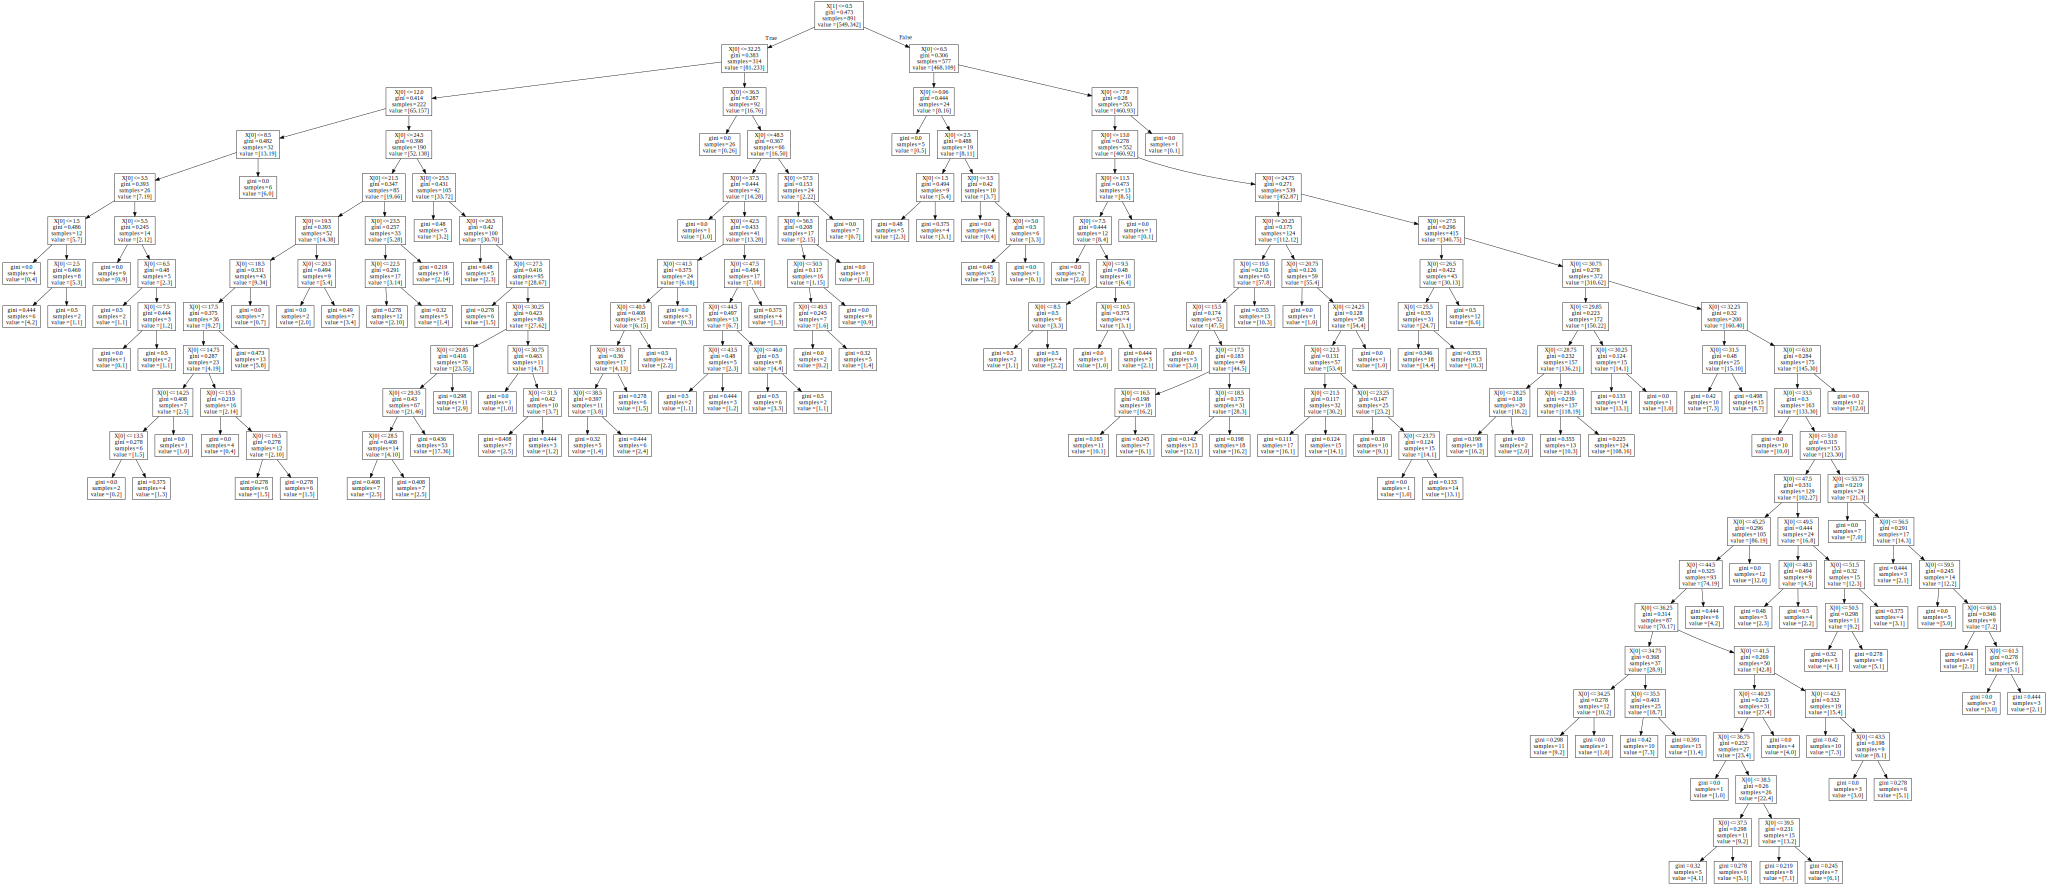

In [14]:
import graphviz
dot_data = tree.export_graphviz(classifier , out_file=None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [15]:
dtree = tree.DecisionTreeClassifier(criterion = "gini" , splitter = 'random' , max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)

In [16]:
dtree

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [17]:
train_labels = train.Survived
classifier = tree.DecisionTreeClassifier(criterion = "gini" , splitter = 'random' , max_leaf_nodes=10,min_samples_leaf=5,max_depth=5)
classifier.fit(train_data , train_labels)
predicted = classifier.predict(test_data)

print('Score : {}'.format(classifier.score(train_data,train_labels)))

Score : 0.7867564534231201


In [18]:
train_labels = train.Survived
classifier = tree.DecisionTreeClassifier(criterion = "gini" , splitter = 'random' , max_leaf_nodes=15,min_samples_leaf=10,max_depth=10)
classifier.fit(train_data , train_labels)
predicted = classifier.predict(test_data)

print('Score : {}'.format(classifier.score(train_data,train_labels)))

Score : 0.7934904601571269


In [19]:
from sklearn import datasets
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

iris = datasets.load_iris()

data = pd.DataFrame({
    'sepal length' : iris.data[:,0],
    'sepal width' : iris.data[:,1] , 
    'petal length' : iris.data[:,2] , 
    'petal width' : iris.data[:,3] , 
    'species' : iris.target
})

x = data[['sepal length' , 'sepal width' , 'petal length' , 'petal width']] 
y=data['species'] 
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

In [20]:
data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9333333333333333


In [22]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9555555555555556


In [23]:
clf = RandomForestClassifier(n_estimators=1500)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9555555555555556
